In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Data checks to perform 
*check missing values  

*check duplicates  

*check data type  

*check the number of unique values of each column   

*check statistics of dataset  

*check various categories present in the different categorical column 

In [5]:
#check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#check duplicate values
df.duplicated().sum()

0

In [7]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#checking the number of unique values in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#check statistical measures
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [11]:
#check various categories 
print("Categories in 'gender' column:     ",end='')
print(df['gender'].unique())
print("Categories in 'race/ethnicity' column:     ",end='')
print(df['race_ethnicity'].unique())
print("Categories in 'parental level of education ' column:     ",end='')
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' column:     ",end='')
print(df['lunch'].unique())
print("Categories in 'test preparation course' column:     ",end='')
print(df['test_preparation_course'].unique())

Categories in 'gender' column:     ['female' 'male']
Categories in 'race/ethnicity' column:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education ' column:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column:     ['standard' 'free/reduced']
Categories in 'test preparation course' column:     ['none' 'completed']


In [12]:
#define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print(f"We have {len(numeric_features)} numerical features : {numeric_features}")
print(f"We have {len(categorical_features)} categorical features : {categorical_features}")

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#Number of students have full marks in math, reading and writing?
reading_full_marks = df[df['reading_score'] == 100]['average'].count()
writing_full_marks = df[df['writing_score'] == 100]['average'].count()
math_full_marks = df[df['math_score'] == 100]['average'].count()
print(f"Number of students with full marks in reading: {reading_full_marks}")
print(f"Number of students with full marks in writing: {writing_full_marks}")
print(f"Number of students with full marks in math: {math_full_marks}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [15]:
# Number of students with less than 20 marks in math, reading and writing?
reading_less_20=df[df["reading_score"]<=20]['average'].count()
writing_less_20=df[df["writing_score"]<=20]['average'].count()
math_less_20=df[df["math_score"]<=20]['average'].count()
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in math: {math_less_20}")

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


# Visualization 
** Visualize average score distribution to make some conclusion ** 

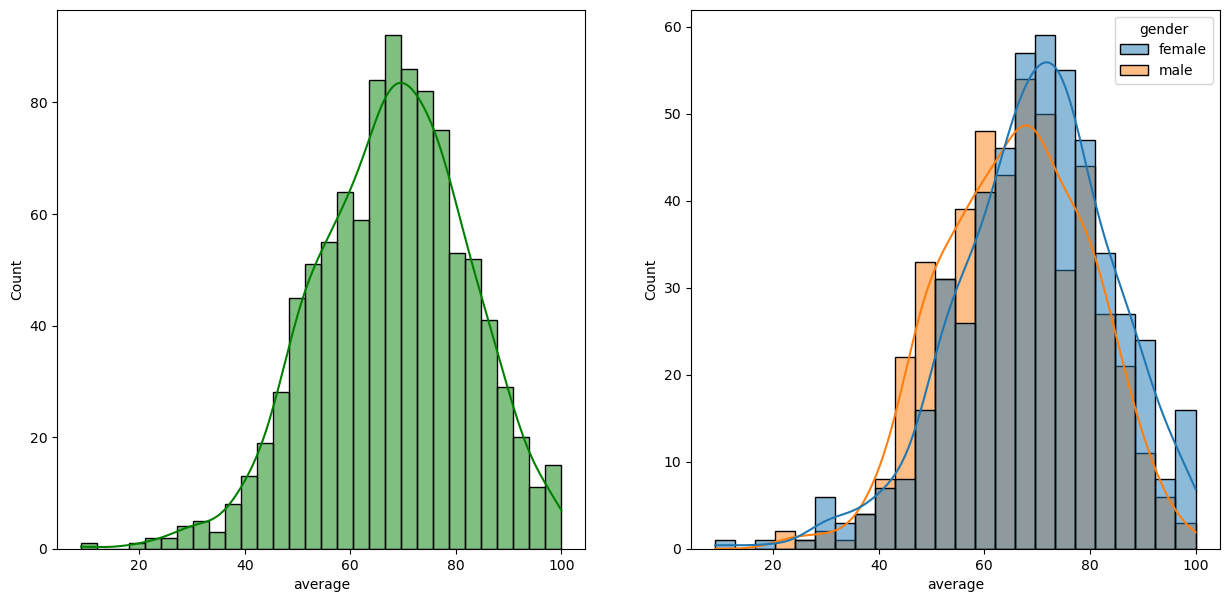

In [16]:
# Visualization average score distribution
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

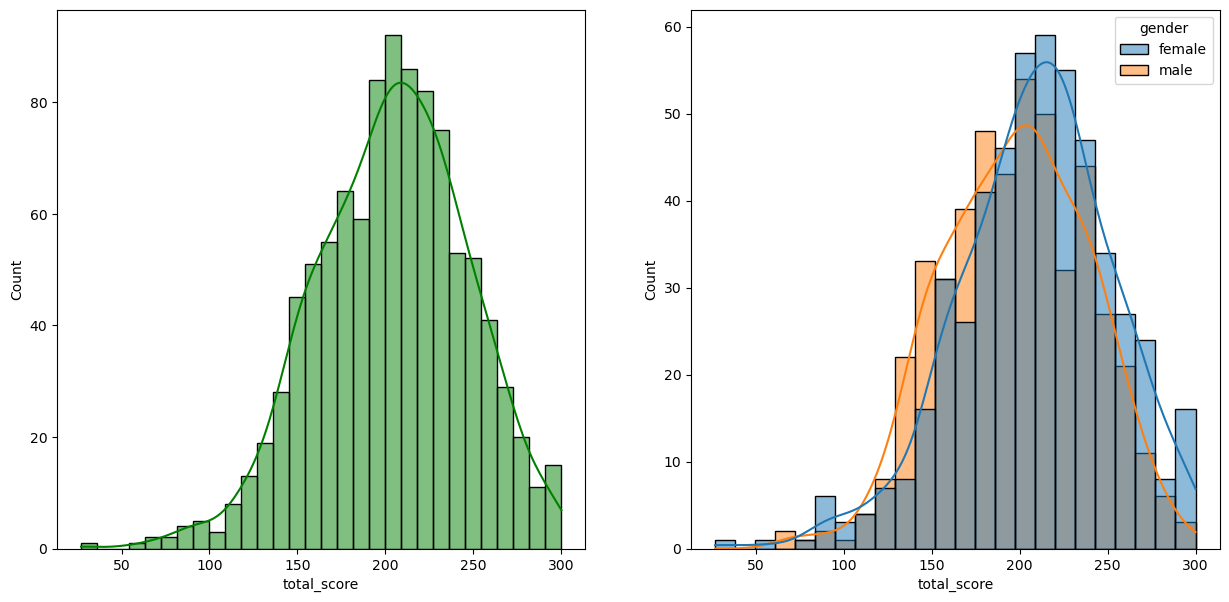

In [17]:
# visualize total score distribution 
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

* Insights  
 
Female students tend to perform well then male students

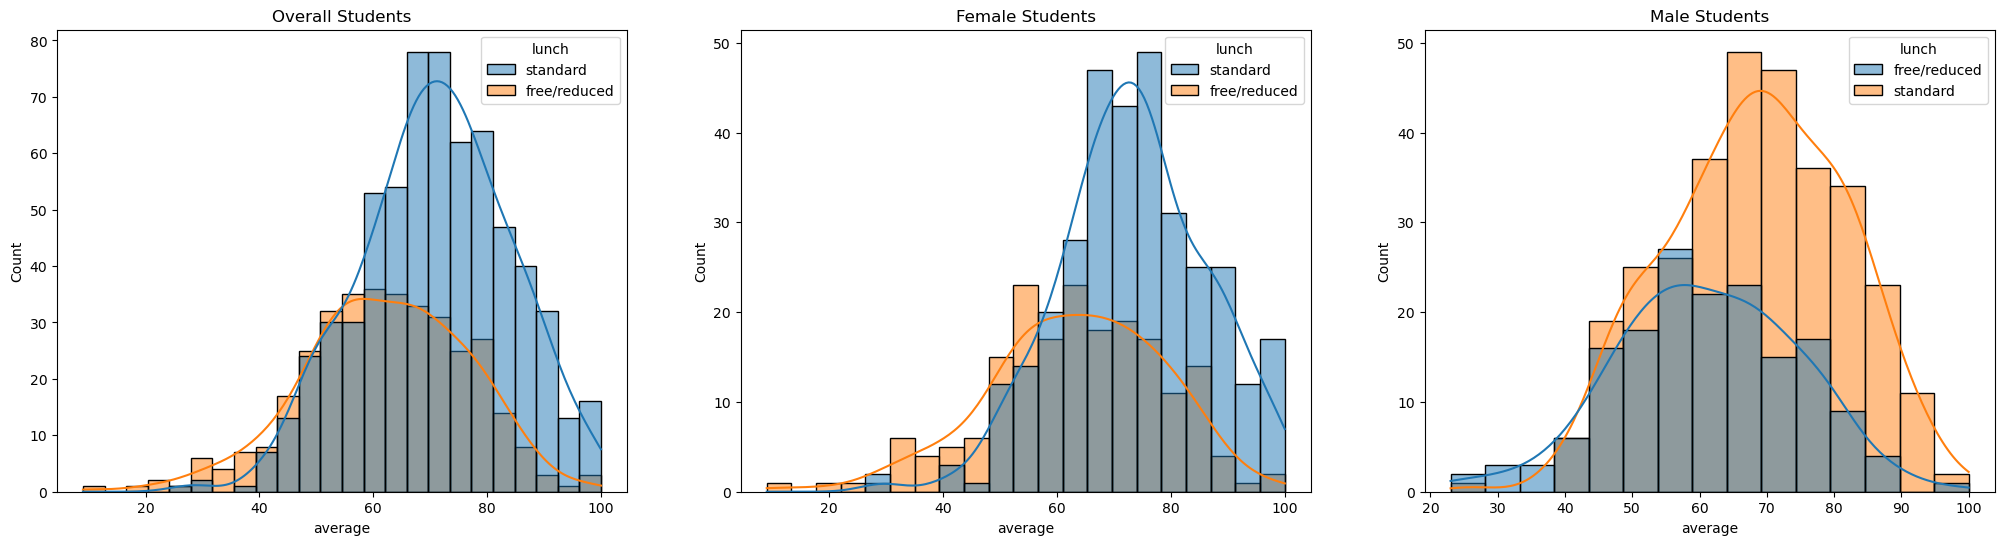

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('Overall Students')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='lunch')
plt.title('Female Students')
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='lunch')
plt.title('Male Students')
plt.show()

* Insights  
Standard lunch helps perform well in exams

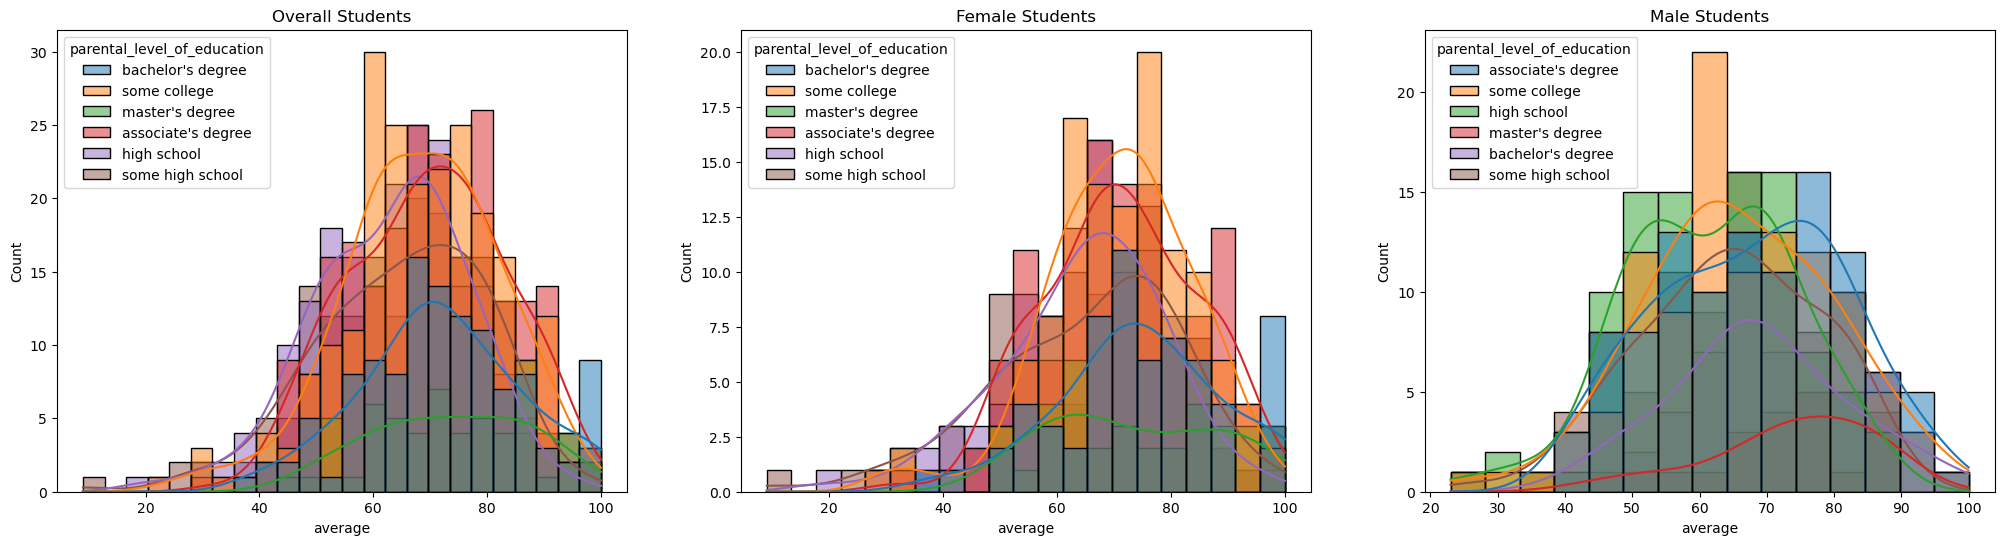

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.title('Overall Students')
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Female Students')            
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='parental_level_of_education')
plt.title('Male Students')
plt.show()

* Insights  
In general parent's education don't help student perform well in exam.

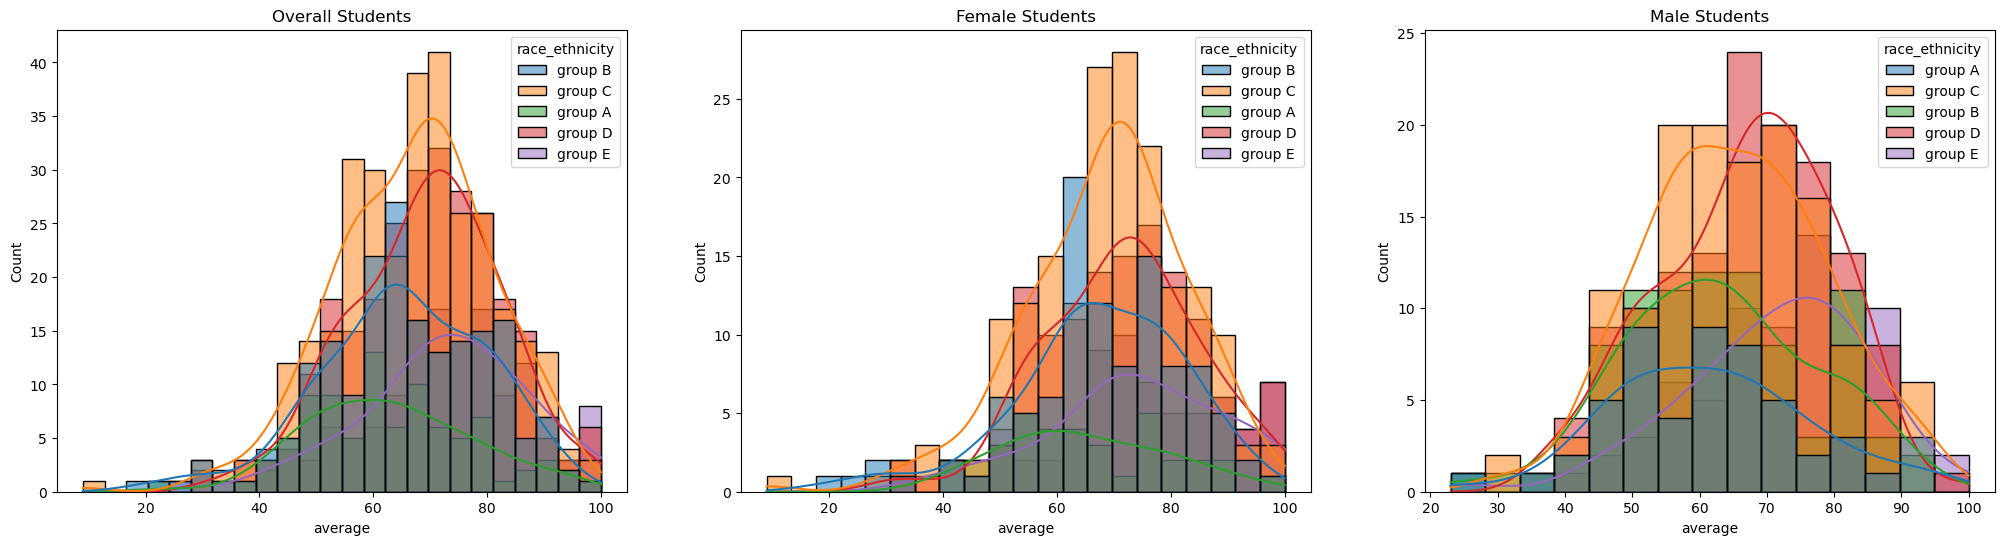

In [22]:

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title('Overall Students')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.title('Female Students')

plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.title('Male Students')
plt.show()

* Insights  
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female